c:\Users\evans\anaconda3\envs\cuda-env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\evans\anaconda3\envs\cuda-env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\evans\anaconda3\envs\cuda-env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\evans\anaconda3\envs\cuda-env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

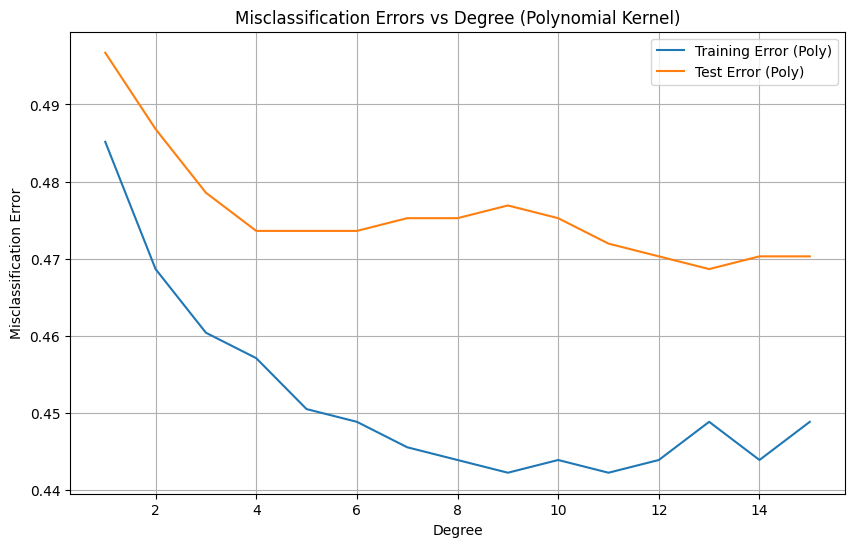

c:\Users\evans\anaconda3\envs\cuda-env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\evans\anaconda3\envs\cuda-env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\evans\anaconda3\envs\cuda-env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\evans\anaconda3\envs\cuda-env\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array w

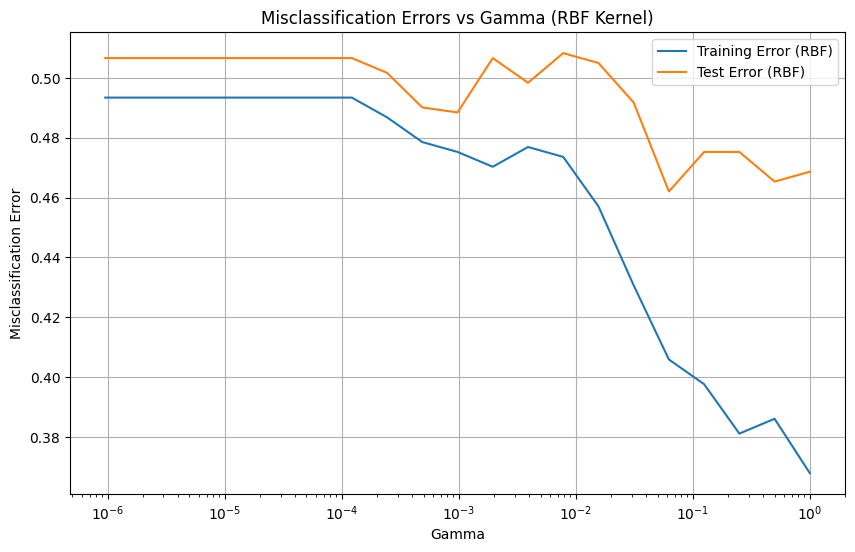

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the hill-valley dataset
X_train = pd.read_csv('D:/School/Applied ML FSU/Applied-ML-FSU/Data/Hill-valley/X.dat', sep = ' ', dtype= str, header=None)
y_train = pd.read_csv('D:/School/Applied ML FSU/Applied-ML-FSU/Data/Hill-valley/Y.dat',header= None)
X_test = pd.read_csv('D:/School/Applied ML FSU/Applied-ML-FSU/Data/Hill-valley/Xtest.dat', sep = ' ', dtype= str, header=None)
y_test = pd.read_csv('D:/School/Applied ML FSU/Applied-ML-FSU/Data/Hill-valley/Ytest.dat', header = None)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Part a) SVM classifier with polynomial kernel of degree d
degrees = range(1, 16)
train_errors_poly = []
test_errors_poly = []

for d in degrees:
    svm_poly = SVC(kernel='poly', C=1, degree=d)
    svm_poly.fit(X_train_scaled, y_train)
    train_pred = svm_poly.predict(X_train_scaled)
    test_pred = svm_poly.predict(X_test_scaled)
    train_errors_poly.append(1 - accuracy_score(y_train, train_pred))
    test_errors_poly.append(1 - accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors_poly, label='Training Error (Poly)')
plt.plot(degrees, test_errors_poly, label='Test Error (Poly)')
plt.title('Misclassification Errors vs Degree (Polynomial Kernel)')
plt.xlabel('Degree')
plt.ylabel('Misclassification Error')
plt.legend()
plt.grid(True)
plt.show()

# Part b) SVM classifier with RBF kernel and different values of gamma
gammas = np.logspace(0, -20, num=21, base=2)
train_errors_rbf = []
test_errors_rbf = []

for gamma in gammas:
    svm_rbf = SVC(kernel='rbf', C=1, gamma=gamma)
    svm_rbf.fit(X_train_scaled, y_train)
    train_pred = svm_rbf.predict(X_train_scaled)
    test_pred = svm_rbf.predict(X_test_scaled)
    train_errors_rbf.append(1 - accuracy_score(y_train, train_pred))
    test_errors_rbf.append(1 - accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.semilogx(gammas, train_errors_rbf, label='Training Error (RBF)')
plt.semilogx(gammas, test_errors_rbf, label='Test Error (RBF)')
plt.title('Misclassification Errors vs Gamma (RBF Kernel)')
plt.xlabel('Gamma')
plt.ylabel('Misclassification Error')
plt.legend()
plt.grid(True)
plt.show()
